In [2]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Load Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#Filter for Data Analyst UK jobs
job_title = 'Data Analyst'
job_country = 'United Kingdom'
df_da_uk = df[(df['job_title_short'] == job_title) & (df['job_country'] == job_country)].copy()

c:\Users\ITZJA\anaconda3\envs\python_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0.5, 0, 'Yearly Salary')

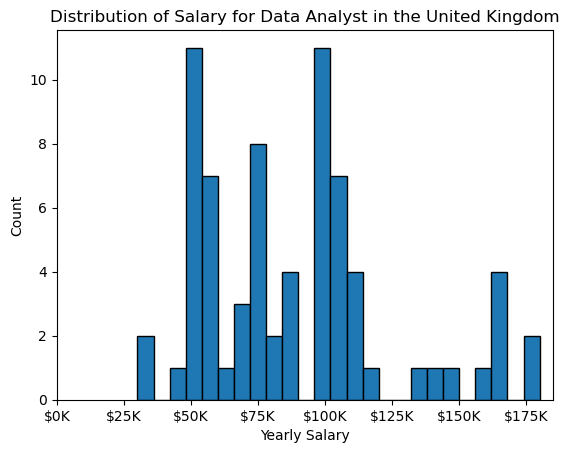

In [3]:
df_da_uk['salary_year_avg'].plot(kind='hist', bins=25, edgecolor='black')
plt.xlim(0, 185_000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title(f'Distribution of Salary for Data Analyst in the {job_country}')
plt.ylabel('Count')
plt.xlabel('Yearly Salary')